General Code for All Questions

In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)

Easy 1: How many unique customers are in the dataset?

There are 5,191 unique customers in the dataset.

In [31]:
    unique_ids = []
    for i in range(len(data["id"])):
        if data["id"][str(i)] not in unique_ids:
            unique_ids.append(data["id"][str(i)])
    print(len(unique_ids))

5191


Easy 2: What are the different categories of products available? How many unique categories are there?

The different categories of products available are Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, and Souvenir. There are 8 unique categories.

In [30]:
# What are the categories? 
print(invoices_df['category'].unique())

# How many unique categories?
print(invoices_df['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


Easy 3: Which payment method is the most popular? How many times was it used?

Among the payment methods (Credit Card, Debit Card, Cash), Cash was the most popular, which was used 44,447 times.

In [3]:
# Getting the payment methods
print(invoices_df['payment_method'].unique())

print(invoices_df['payment_method'].value_counts())
# Whichever was the largest here

['Credit Card' 'Debit Card' 'Cash']
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


Medium 1: What are the three most popular categories, by total sales?

By total sales, the three most popular categories are Clothing, Shoes, and Technology.

In [27]:
sales = {}
clothing_sales = 0
shoes_sales = 0
books_sales = 0
cosmetics_sales = 0
foodbev_sales = 0
toys_sales = 0
tech_sales = 0
souvenir_sales = 0
for i in range(0,len(invoices_df['category'])):
    if invoices_df['category'][i] == "Clothing":
        clothing_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Shoes":
        shoes_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Books":
        books_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Cosmetics":
        cosmetics_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Food & Beverage":
        foodbev_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Toys":
        toys_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Technology":
        tech_sales += invoices_df['price'][i]
    elif invoices_df['category'][i] == "Souvenir":
        souvenir_sales += invoices_df['price'][i]
sales["Clothing"] = clothing_sales
sales["Shoes"] = shoes_sales
sales["Books"] = books_sales
sales["Cosmetics"] = cosmetics_sales
sales["Food & Beverage"] = foodbev_sales
sales["Toys"] = toys_sales
sales["Technology"] = tech_sales
sales["Souvenir"] = souvenir_sales
sorted_sales = sorted(sales, key=lambda x: sales[x],reverse=True)

for key in sorted_sales:
    print(key, sales[key])

Clothing 31075684.63998918
Shoes 18135336.8899991
Technology 15772050.0
Cosmetics 1848606.89999989
Toys 1086704.639999995
Food & Beverage 231568.71000001286
Books 226977.29999999964
Souvenir 174436.8300000028


Medium 2: What are the total sales attributed to customers over the age of 45?

The total sales attributed to customers over the age of 45 is 22370553.270001445 or 22,370,553.27.

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)

ids = list(invoices_df["customer_id"])
age_list = []
for item in ids:
    for key, value in data["id"].items():
        if value == item:
            key
            age = data["age"][str(key)]
            age_list.append(age)

invoices_df["Age"] = age_list

sales = 0
for i in range(0,len(invoices_df["Age"])):
    if invoices_df['Age'][i] == "nan":
        sales += 0
    elif invoices_df['Age'][i] > 45:
        sales += invoices_df['price'][i]

print(sales)

22370553.270001445


Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

From January to March, the sales are at some of their highest, with January being the month when sales are at their largest, while they are around the same from April to December. Across the months and years, Clothing, Shoes, and Technology are consistently the best-selling categories.

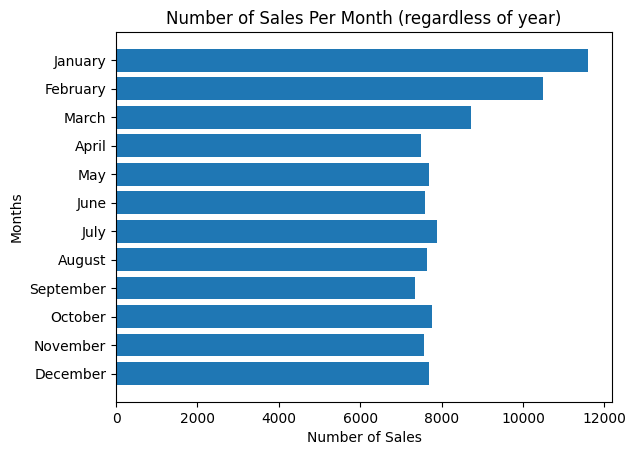

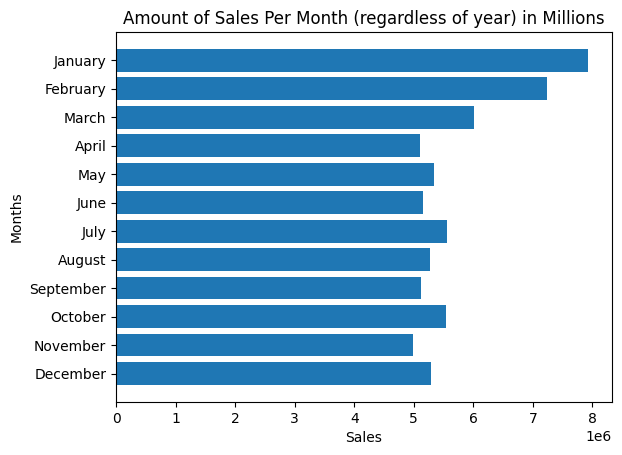

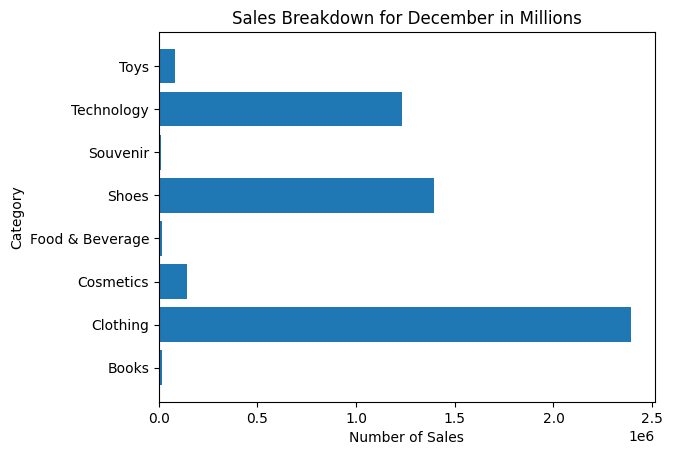

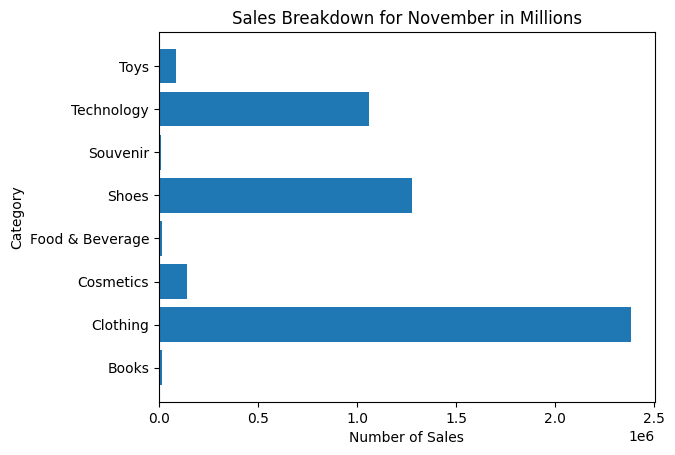

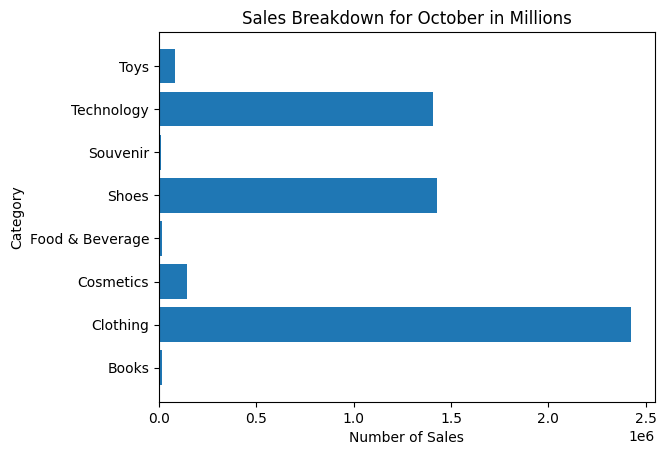

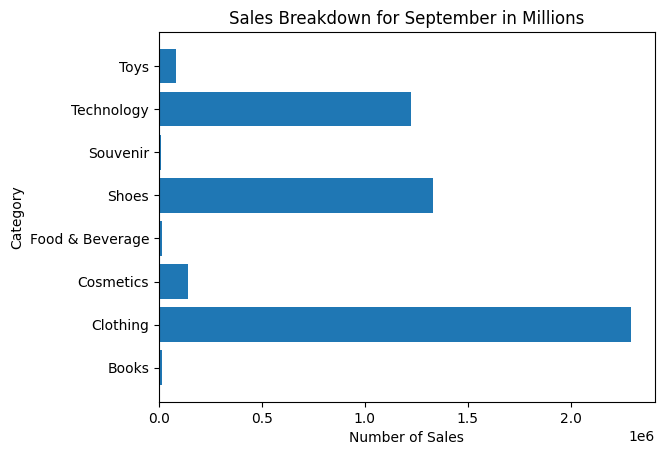

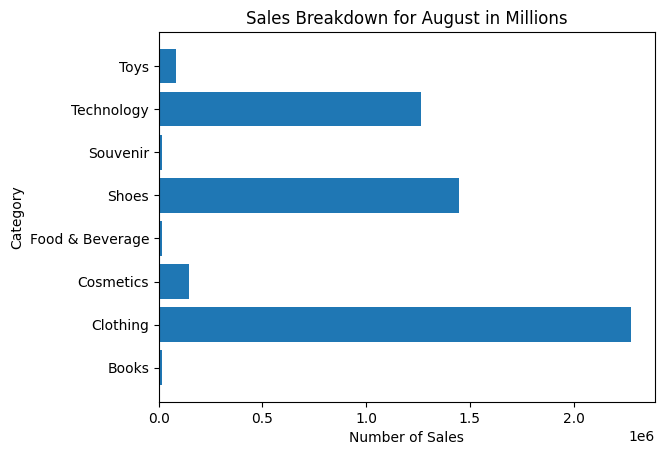

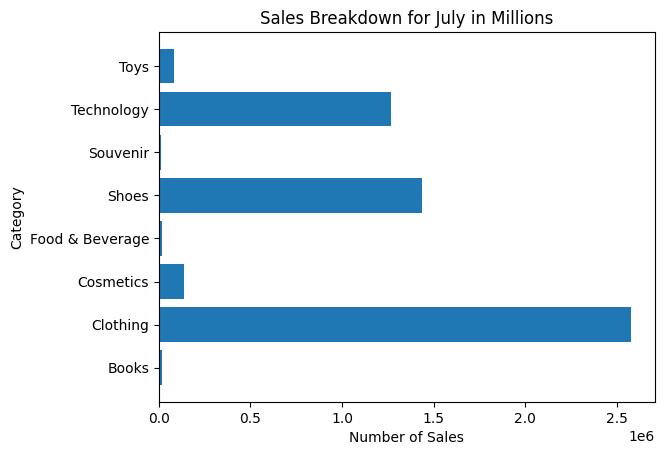

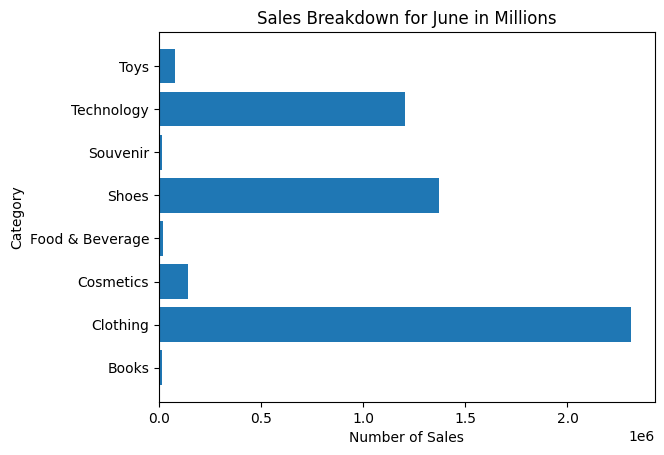

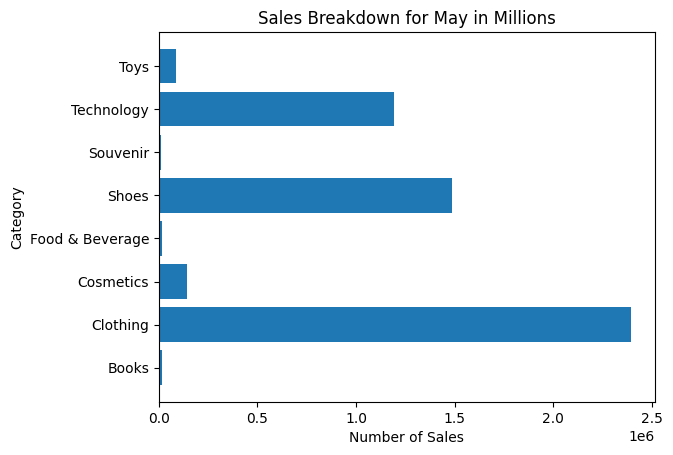

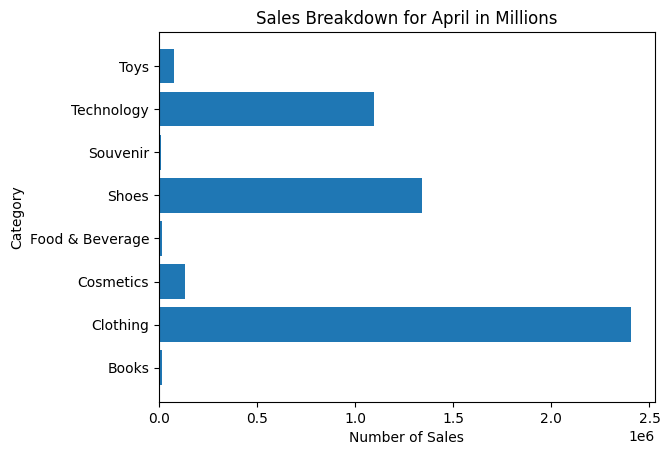

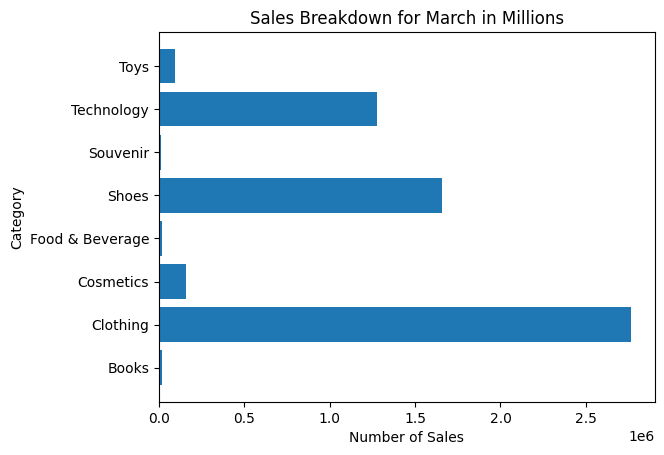

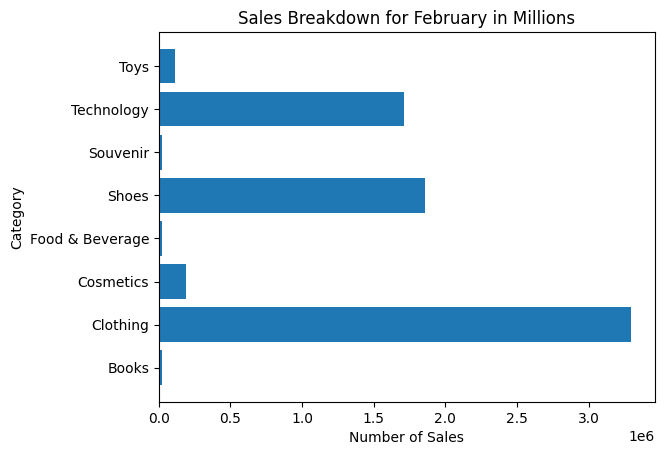

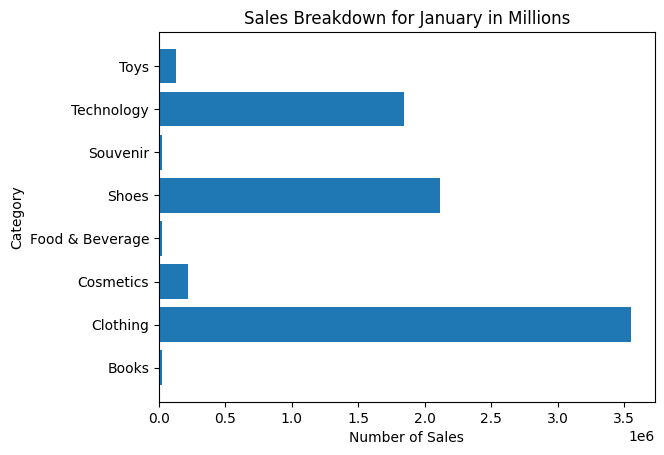

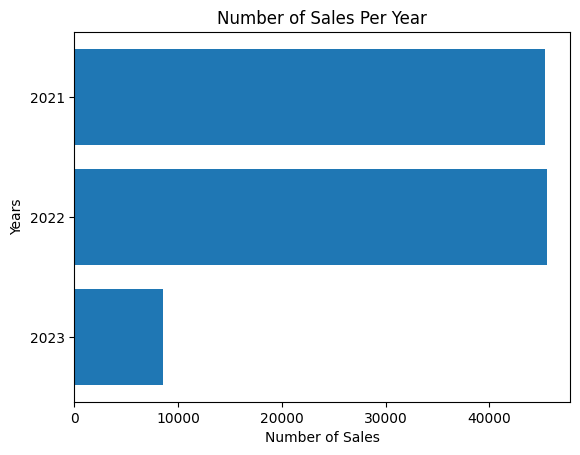

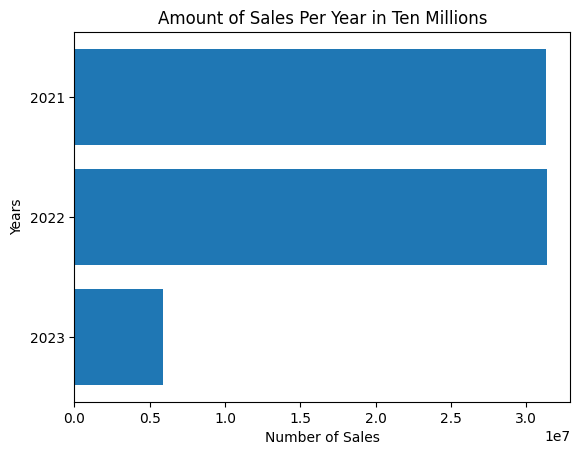

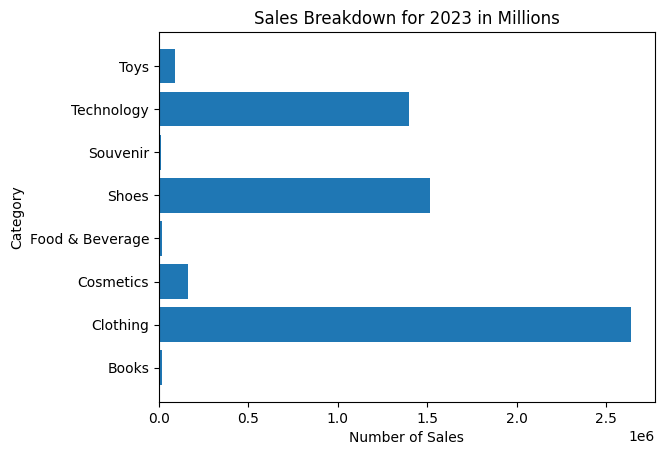

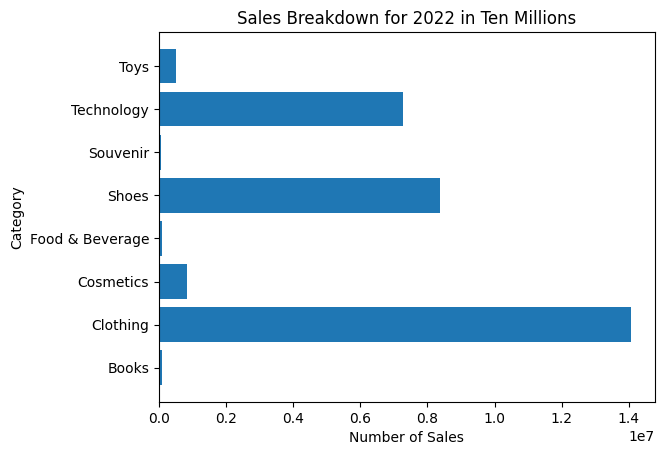

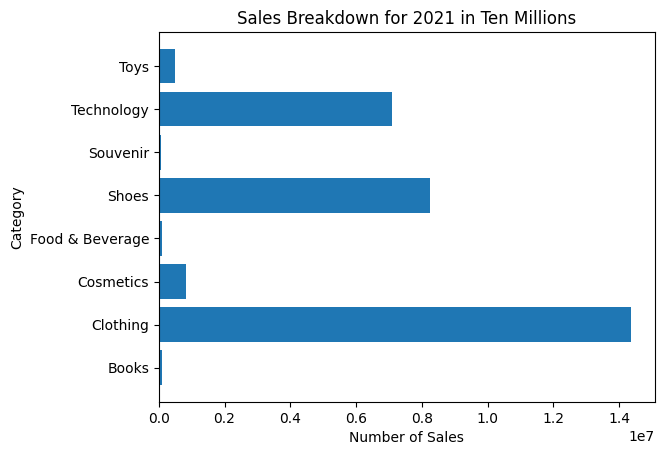

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Age,Age_Range,Month_of_Invoice,Year_of_Invoice
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,None,August,2022
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,34.0,30-39,December,2021
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,46.0,40-49,November,2021
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,46.0,40-49,May,2021
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,NaN,None,October,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,53.0,50-59,September,2022
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,NaN,None,September,2021
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,36.0,30-39,March,2021
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,64.0,60-69,March,2021


In [9]:
january = 0
february = 0
march = 0
april = 0
may = 0
june = 0
july = 0
august = 0
september = 0
october = 0
november = 0
december = 0
month_invoice = []
for i in range(0,len(invoices_df['invoice_date'])):
    date = invoices_df['invoice_date'][i].split('/')
    month = date[1]
    if month == "01" or month == "1":
        january += 1
        month_invoice.append("January")
    elif month == "02" or month == "2":
        february += 1
        month_invoice.append("February")
    elif month == "03" or month == "3":
        march += 1
        month_invoice.append("March")
    elif month == "04" or month == "4":
        april += 1
        month_invoice.append("April")
    elif month == "05" or month == "5":
        may += 1
        month_invoice.append("May")
    elif month == "06" or month == "6":
        june += 1
        month_invoice.append("June")
    elif month == "07" or month == "7":
        july += 1
        month_invoice.append("July")
    elif month == "08" or month == "8":
        august += 1
        month_invoice.append("August")
    elif month == "09" or month == "9":
        september += 1
        month_invoice.append("September")
    elif month == "10":
        october += 1
        month_invoice.append("October")
    elif month == "11":
        november += 1
        month_invoice.append("November")
    elif month == "12":
        december += 1
        month_invoice.append("December")

invoices_df['Month_of_Invoice'] = month_invoice

pivot_table_month = invoices_df.pivot_table(index='category',columns='Month_of_Invoice', values='price', aggfunc='sum')

#Number of Sales Per Month (regardless of year)
months = ["December","November","October","September","August","July","June","May","April","March","February","January"]
values = [december,november,october,september,august,july,june,may,april,march,february,january]
plt.barh(months, values)
plt.title("Number of Sales Per Month (regardless of year)")
plt.xlabel("Number of Sales")
plt.ylabel('Months')
plt.show()

#Amount of Sales Per Month (regardless of year)
months = ["December","November","October","September","August","July","June","May","April","March","February","January"]
monthly_sales = [pivot_table_month[item].sum() for item in months]
plt.barh(months, monthly_sales)
plt.title("Amount of Sales Per Month (regardless of year) in Millions")
plt.xlabel("Sales")
plt.ylabel('Months')
plt.show()

#Monthly Breakdown of sales per category (regardless of year)
for item in months:
    categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
    sales_per_category = list(pivot_table_month[item])
    plt.barh(categories, sales_per_category)
    plt.title("Sales Breakdown for"+" "+item+" "+"in Millions")
    plt.xlabel("Number of Sales")
    plt.ylabel('Category')
    plt.show()

twenty_one = 0
twenty_two = 0
twenty_three = 0
years = []
year_invoice = []
for i in range(0,len(invoices_df['invoice_date'])):
    date = invoices_df['invoice_date'][i].split('/')
    year = date[2]
    years.append(year)
    if year == "2021":
        twenty_one += 1
        year_invoice.append("2021")
    elif year == "2022":
        twenty_two += 1
        year_invoice.append("2022")
    elif year == "2023":
        twenty_three += 1
        year_invoice.append("2023")
#Using print(set(years)) allowed me to see what the unique years are

invoices_df['Year_of_Invoice'] = year_invoice

pivot_table_year = invoices_df.pivot_table(index='category',columns='Year_of_Invoice', values='price', aggfunc='sum')

#Number of Sales Per Year
years = ["2023","2022","2021"]
values = [twenty_three,twenty_two,twenty_one]
plt.barh(years, values)
plt.title("Number of Sales Per Year")
plt.xlabel("Number of Sales")
plt.ylabel('Years')
plt.show()

#Amount of Sales Per Year
years = ["2023","2022","2021"]
yearly_sales = [pivot_table_year[item].sum() for item in years]
plt.barh(years, yearly_sales)
plt.title("Amount of Sales Per Year in Ten Millions")
plt.xlabel("Number of Sales")
plt.ylabel('Years')
plt.show()

#Yearly Breakdown of sales per category
for item in years:
    if item == "2023":
        categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
        sales_per_year = list(pivot_table_year[item])
        plt.barh(categories, sales_per_year)
        plt.title("Sales Breakdown for"+" "+item+" "+"in Millions")
        plt.xlabel("Number of Sales")
        plt.ylabel('Category')
        plt.show()
    else:
        categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
        sales_per_year = list(pivot_table_year[item])
        plt.barh(categories, sales_per_year)
        plt.title("Sales Breakdown for"+" "+item+" "+"in Ten Millions")
        plt.xlabel("Number of Sales")
        plt.ylabel('Category')
        plt.show()

display(invoices_df)

Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)

ids = list(invoices_df["customer_id"])
age_list = []
for item in ids:
    for key, value in data["id"].items():
        if value == item:
            key
            age = data["age"][str(key)]
            age_list.append(age)

invoices_df["Age"] = age_list

age_classifications = []
#["None","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"]

for i in range(0,len(invoices_df['Age'])):
    if invoices_df['Age'][i] >= 10 and invoices_df['Age'][i] <= 19:
        age_classifications.append("10-19")
    elif invoices_df['Age'][i] >= 20 and invoices_df['Age'][i] <= 29:
        age_classifications.append("20-29")
    elif invoices_df['Age'][i] >= 30 and invoices_df['Age'][i] <= 39:
        age_classifications.append("30-39")
    elif invoices_df['Age'][i] >= 40 and invoices_df['Age'][i] <= 49:
        age_classifications.append("40-49")
    elif invoices_df['Age'][i] >= 50 and invoices_df['Age'][i] <= 59:
        age_classifications.append("50-59")
    elif invoices_df['Age'][i] >= 60 and invoices_df['Age'][i] <= 69:
        age_classifications.append("60-69")
    elif invoices_df['Age'][i] >= 70 and invoices_df['Age'][i] <= 79:
        age_classifications.append("70-79")
    elif invoices_df['Age'][i] >= 80 and invoices_df['Age'][i] <= 89:
        age_classifications.append("80-89")
    elif invoices_df['Age'][i] >= 90 and invoices_df['Age'][i] <= 99:
        age_classifications.append("90-99")
    else:
        age_classifications.append("None")
        
invoices_df['Age_Range'] = age_classifications

pivot_table = invoices_df.pivot_table(index='category',columns='Age_Range', values='price', aggfunc='sum')
display(pivot_table)

Age_Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,None
category,,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00,90339.45
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60,12537042.32
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32,751518.78
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51,93569.93
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60,7301068.05
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34,72984.06
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00,6481650.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84,432947.20
